In [27]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

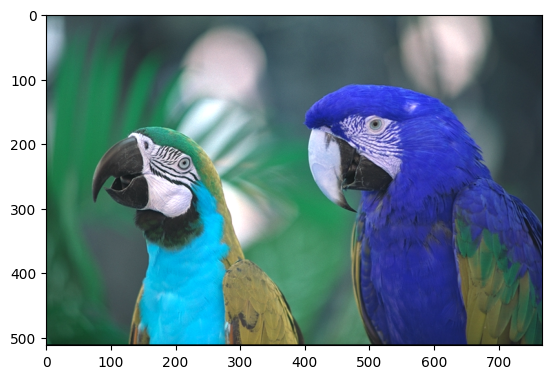

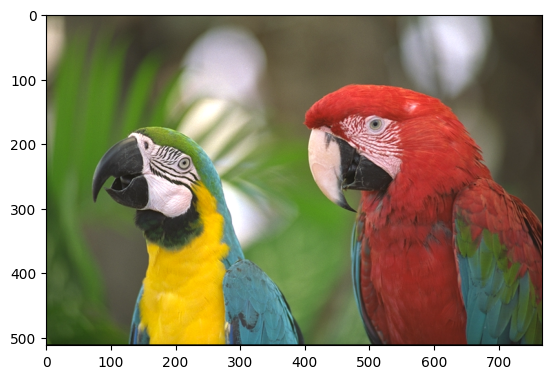

In [28]:
mainAfbeelding = cv.imread('img/kodim23.png')
plt.imshow(mainAfbeelding)
plt.show()
#to rgb
mainAfbeelding_rgb = cv.cvtColor(mainAfbeelding, cv.COLOR_BGR2RGB)

plt.imshow(mainAfbeelding_rgb)
plt.show()

In [29]:
# reshape the image to a 2d array of pixels and 3 color values (RGB)    
pixelValues_main = mainAfbeelding_rgb.reshape((-1,3))

# convert to float32
pixelValues_main = np.float32(pixelValues_main)
print(pixelValues_main.shape)

(393216, 3)


In [30]:
#define criteria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 12
_, labels, centers = cv.kmeans(pixelValues_main, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [31]:
# convert back to uint8
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

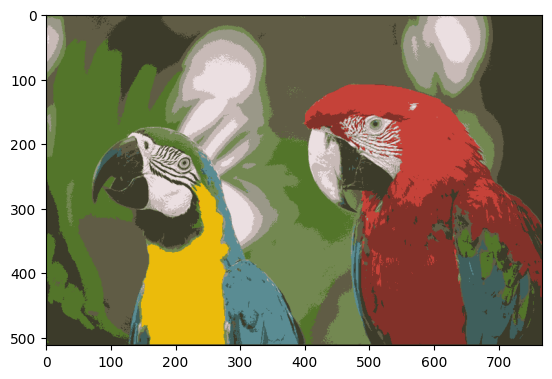

In [32]:
#reshape the segmented image to the size of the input image
segmented_image = segmented_image.reshape(mainAfbeelding_rgb.shape)

#show the image
plt.imshow(segmented_image)
plt.show()

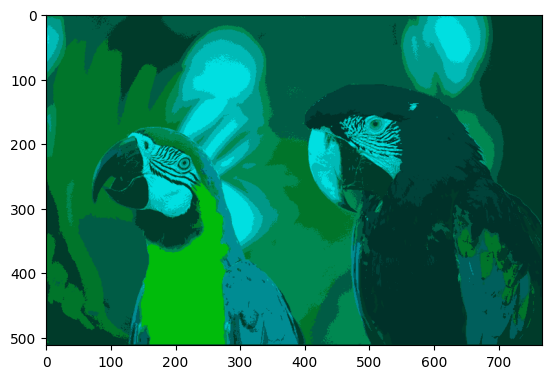

In [33]:
#only show green in segmented image
segmented_image[:,:,0] = 0  

plt.imshow(segmented_image)
plt.show()

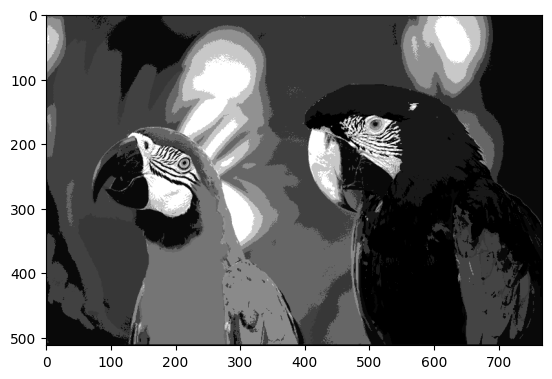

In [34]:
# segmented image to grayscale
segmented_image_gray = cv.cvtColor(segmented_image, cv.COLOR_BGR2GRAY)
plt.imshow(segmented_image_gray,cmap='gray')    
plt.show()

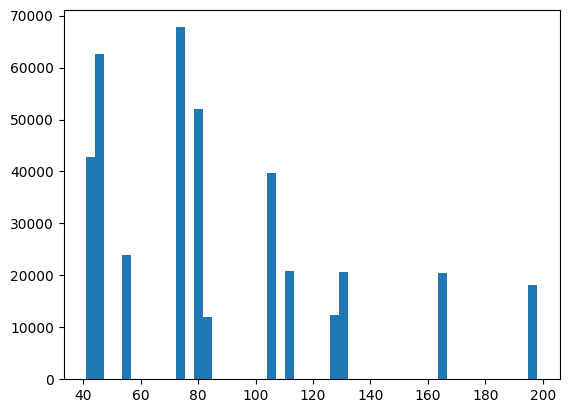

In [35]:
# make histogram of gray pixels
seg_flat = segmented_image_gray.flatten()
plt.hist(seg_flat, bins= 50)
plt.show()

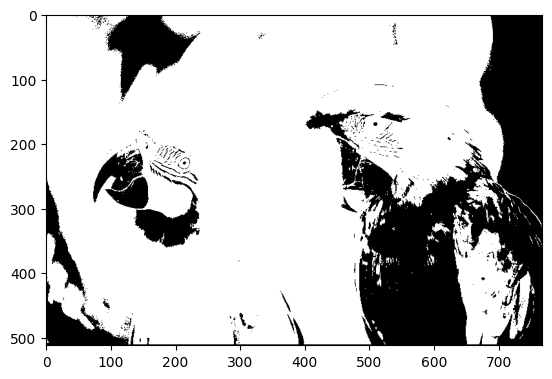

In [36]:
new_greyImage = segmented_image_gray > 50
plt.imshow(new_greyImage,cmap='gray')
plt.show()

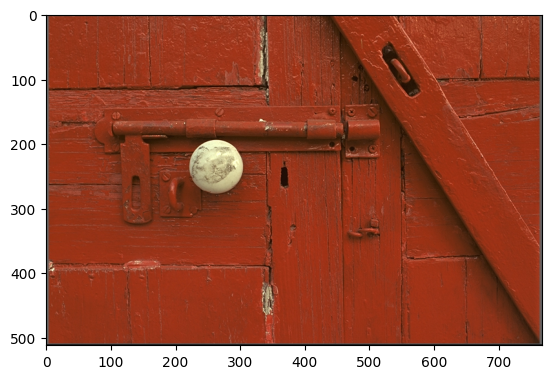

In [38]:
image_2_main = plt.imread('img/kodim02.png')
plt.imshow(image_2_main)
plt.show()